In [1]:
import torch
from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer, EsmForMaskedLM
from tokenizers import Tokenizer
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

/opt/anaconda3/envs/MachLearn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('/Users/johnhutchens/Desktop/Practicum/Data/ems_pbd_long_matrices.pickle',
           'rb') as f:
    esm_dict = pickle.load(f)

with open('/Users/johnhutchens/Desktop/Practicum/Data/pg_pbd_long_matrices.pickle',
           'rb') as f:
    pg_dict = pickle.load(f)

In [3]:
seq_esm_5 = esm_dict[5]['sequence']
seq_pg_5 = pg_dict[5]['sequence']

In [4]:
print(seq_esm_5)
print(seq_pg_5)

print(len(seq_esm_5))
print(len(seq_pg_5))

MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAAELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL
MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAAELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL
166
166


In [24]:
lp_esm_matrix5 = esm_dict[90]['log_probs']

lp_pg_matrix5 = pg_dict[90]['log_probs']

for i in range(15):
    print(torch.sum(torch.exp(lp_esm_matrix5[i])))
    print(torch.sum(torch.exp(lp_pg_matrix5[i])))

tensor(1.0000)
tensor(0.9946)
tensor(1.0000)
tensor(0.9997)
tensor(1.0000)
tensor(0.9993)
tensor(1.0000)
tensor(0.9998)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9998)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9998)
tensor(1.0000)
tensor(0.9998)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9999)


In [25]:
lp_esm_matrix5[0]

tensor([-1.1557e+01, -1.4627e+01, -1.3542e+01, -1.3628e+01, -1.2969e+01,
        -1.3552e+01, -1.4000e+01, -1.2408e+01, -1.2500e+01, -1.1844e+01,
        -7.2953e-05, -1.2834e+01, -1.1725e+01, -1.2938e+01, -1.2986e+01,
        -1.1974e+01, -1.1698e+01, -1.1604e+01, -1.4222e+01, -1.3845e+01])

In [28]:
A = lp_esm_matrix5
B = lp_pg_matrix5

eA = torch.exp(A)
eB = torch.exp(B)

kl_div = torch.sum(eA[100] * (A[100] - B[100]))
kl_div

tensor(2.7702)

In [36]:
A = lp_esm_matrix5
B = lp_pg_matrix5

eA = torch.exp(A)
eB = torch.exp(B)

n = len(A)

kl_list = []
for i in range(n):
    kl_div = torch.sum(eA[i] * (A[i] - B[i]))
    kl_list.append(kl_div)

In [40]:
print(np.array(kl_list).mean())
kl_list

2.6297421


[tensor(1.2228),
 tensor(2.5764),
 tensor(3.0078),
 tensor(2.8355),
 tensor(2.4624),
 tensor(3.9679),
 tensor(2.0353),
 tensor(1.8365),
 tensor(2.0014),
 tensor(3.6016),
 tensor(2.7130),
 tensor(3.0274),
 tensor(2.4243),
 tensor(2.6462),
 tensor(2.3225),
 tensor(2.8679),
 tensor(2.8478),
 tensor(3.2576),
 tensor(2.4889),
 tensor(2.6010),
 tensor(2.9649),
 tensor(2.5303),
 tensor(2.8536),
 tensor(3.3274),
 tensor(2.8472),
 tensor(2.8422),
 tensor(2.7783),
 tensor(2.7561),
 tensor(2.9389),
 tensor(2.7700),
 tensor(3.6692),
 tensor(2.7584),
 tensor(2.4086),
 tensor(1.5679),
 tensor(2.2319),
 tensor(1.4741),
 tensor(2.8514),
 tensor(2.5016),
 tensor(2.3177),
 tensor(1.4403),
 tensor(1.7488),
 tensor(2.3921),
 tensor(2.8052),
 tensor(1.6172),
 tensor(2.6272),
 tensor(2.0019),
 tensor(2.7957),
 tensor(2.6219),
 tensor(2.2652),
 tensor(2.3411),
 tensor(2.8352),
 tensor(2.9541),
 tensor(2.9954),
 tensor(2.9129),
 tensor(3.0231),
 tensor(2.8474),
 tensor(2.3608),
 tensor(2.4487),
 tensor(2.9261

In [31]:
kl_dict = dict()

for j in range(100):
    
    A = esm_dict[j]['log_probs']
    B = pg_dict[j]['log_probs']

    eA = torch.exp(A)
    eB = torch.exp(B)

    n = len(A)

    kl_list = []
    for i in range(n):
        kl_div = torch.sum(eB[i] * (B[i] - A[i]))
        kl_list.append(kl_div)
    kl_dict[j] = kl_list

In [32]:
for i in kl_dict:
    print(kl_dict[i])
    print(torch.tensor(kl_dict[i]).mean())

[tensor(3.5635), tensor(2.3260), tensor(4.4802), tensor(4.5077), tensor(4.5218), tensor(1.9239), tensor(6.0981), tensor(3.0811), tensor(2.0699), tensor(1.2704), tensor(5.2890), tensor(1.7016), tensor(1.0483), tensor(3.3612), tensor(7.7198), tensor(2.9656), tensor(1.4854), tensor(5.4932), tensor(4.7121), tensor(2.4097), tensor(7.0991), tensor(2.1845), tensor(2.5608), tensor(3.8425), tensor(3.1152), tensor(8.7323), tensor(1.5568), tensor(3.8827), tensor(6.9182), tensor(8.3810), tensor(3.8060), tensor(3.6277), tensor(7.7950), tensor(8.5509), tensor(2.9162), tensor(2.7592), tensor(6.3034), tensor(5.6267), tensor(3.7581), tensor(6.9939), tensor(3.5912), tensor(3.0230), tensor(3.6835), tensor(8.9414), tensor(2.3441), tensor(3.4303), tensor(5.7687), tensor(7.1818), tensor(2.9691), tensor(5.9452), tensor(3.9086), tensor(5.2464), tensor(5.9424), tensor(4.7061), tensor(5.8591), tensor(5.3077), tensor(3.7286), tensor(3.3370), tensor(5.2112), tensor(2.9928), tensor(3.8093), tensor(5.6784), tensor(

In [33]:
print(kl_dict[90])
print(torch.tensor(kl_dict[90]).mean())

[tensor(6.1988), tensor(4.9783), tensor(5.7101), tensor(3.5648), tensor(5.2510), tensor(6.5806), tensor(6.5529), tensor(4.9162), tensor(2.4120), tensor(9.9300), tensor(7.0400), tensor(9.0182), tensor(7.1797), tensor(6.4694), tensor(6.7249), tensor(7.4610), tensor(6.3081), tensor(9.7127), tensor(8.0109), tensor(7.9976), tensor(7.7212), tensor(7.3116), tensor(8.4970), tensor(7.1596), tensor(5.1770), tensor(8.3515), tensor(9.0513), tensor(8.7546), tensor(7.3289), tensor(8.7430), tensor(11.2986), tensor(6.7013), tensor(7.8014), tensor(2.3613), tensor(4.8224), tensor(3.2007), tensor(4.1801), tensor(6.2140), tensor(6.2167), tensor(1.9086), tensor(2.2450), tensor(8.7187), tensor(8.3493), tensor(1.8403), tensor(6.6467), tensor(9.5631), tensor(8.7281), tensor(4.6430), tensor(6.1975), tensor(6.6596), tensor(6.8936), tensor(6.9032), tensor(6.7130), tensor(5.7996), tensor(6.4298), tensor(9.4102), tensor(4.7878), tensor(9.5893), tensor(8.1312), tensor(4.8606), tensor(3.3050), tensor(5.3562), tensor

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1294/2061360032.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.array(eA)[10],
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1294/2061360032.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.array(eB)[10]


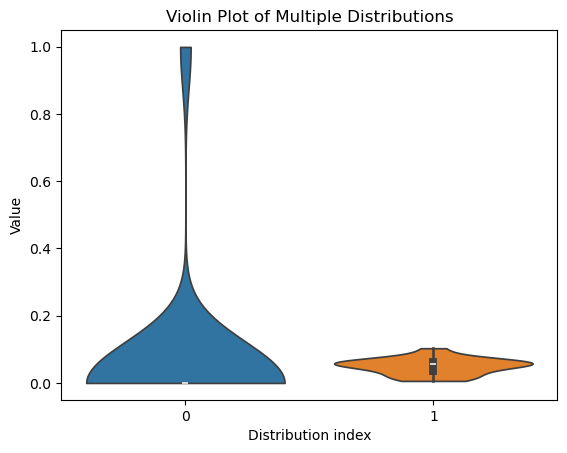

In [41]:
A = esm_dict[5]['log_probs']
#B = esm_dict[6]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists = [
    np.array(eA)[10],
    np.array(eB)[10]
]

# Create violin plot
sns.violinplot(data=dists, cut=0)

# Label axes
plt.xlabel('Distribution index')
plt.ylabel('Value')
plt.title('Violin Plot of Multiple Distributions')

plt.show()

In [42]:
eA = torch.exp(A)
eB = torch.exp(B)

torch.min(eB)

tensor(0.0028)

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1294/1974464711.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  dist1 = np.array(eA)[98]
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1294/1974464711.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  dist2 = np.array(eB)[98]


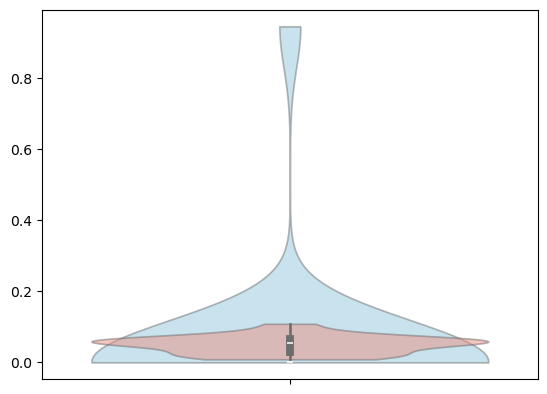

In [14]:
# Two distributions
dist1 = np.array(eA)[98]
dist2 = np.array(eB)[98]

sns.violinplot(y=dist1, color="skyblue", alpha=0.5, cut=0)
sns.violinplot(y=dist2, color="salmon", alpha=0.5, cut=0)

plt.title("")
plt.ylabel("")
plt.show()

In [43]:
A = esm_dict[3]['log_probs']
B = pg_dict[3]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists1 = []
dists2 = []
for i in range(len(A)):
    da = np.array(eA[i])
    db = np.array(eB[i])
    dists1.append(da)
    dists2.append(db)



/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1294/2506594936.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  da = np.array(eA[i])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1294/2506594936.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  db = np.array(eB[i])


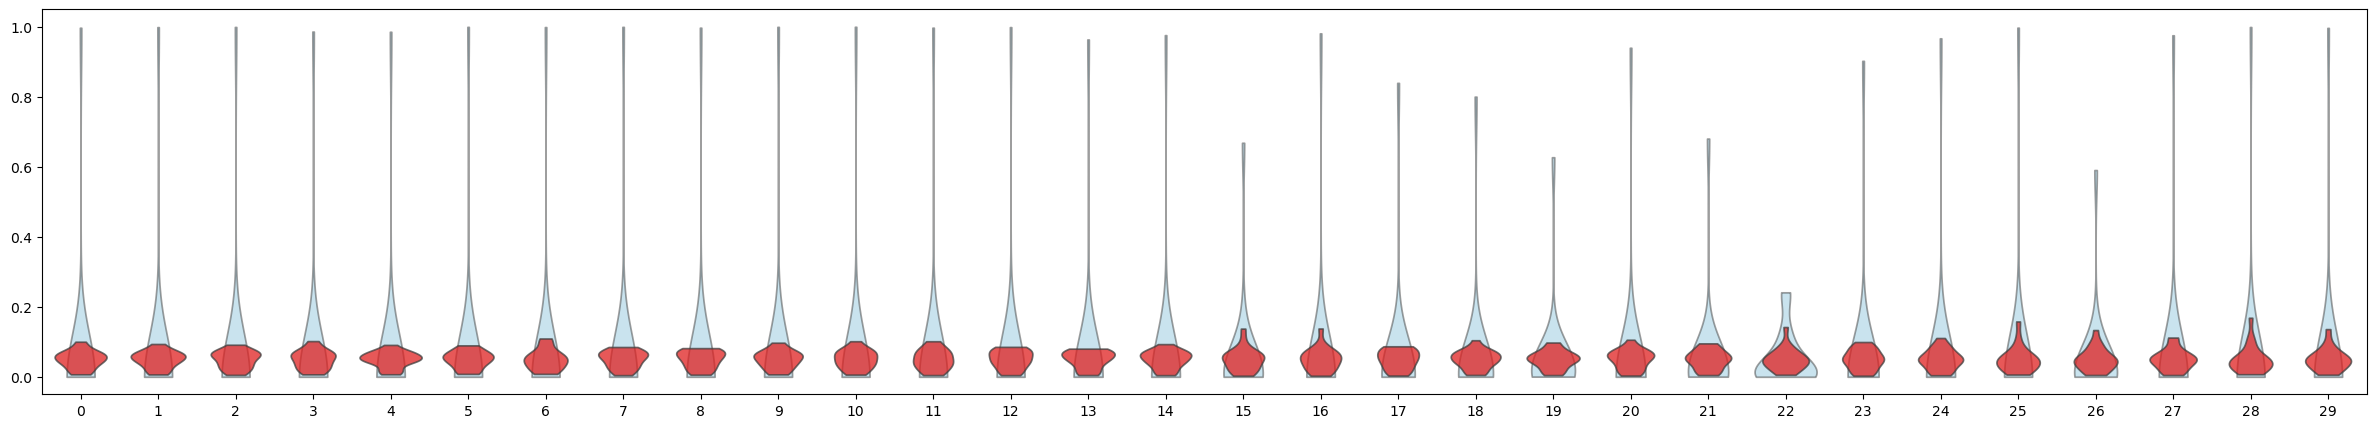

In [55]:
plt.figure(figsize=(30, 5))
sns.violinplot(data=dists1[20:50], color="skyblue", alpha=0.5, inner=None, cut=0)
sns.violinplot(data=dists2[20:50], color="red", alpha=0.75, inner=None, cut=0)
plt.title("")
plt.ylabel("")
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2843/3143873620.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  da = np.array(eA[i])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2843/3143873620.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  db = np.array(eB[i])


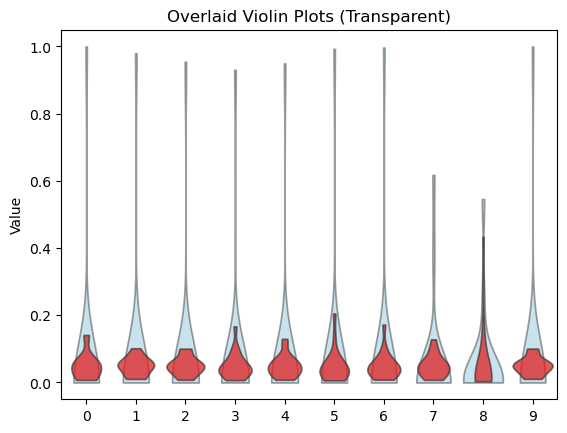

In [18]:
A = esm_dict[21]['log_probs']
B = pg_dict[21]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists1 = []
dists2 = []
for i in range(len(A)):
    da = np.array(eA[i])
    db = np.array(eB[i])
    dists1.append(da)
    dists2.append(db)

sns.violinplot(data=dists1[0:10], color="skyblue", alpha=0.5, inner=None, cut=0)
sns.violinplot(data=dists2[0:10], color="red", alpha=0.75, inner=None, cut=0)

plt.title("Overlaid Violin Plots (Transparent)")
plt.ylabel("Value")
plt.show()

In [75]:
print(esm_dict[21]['log_probs'][0][1:10])
print(esm_dict[97]['log_probs'][0][1:10])

tensor([-14.6385, -13.3915, -13.6057, -12.7970, -13.1115, -13.8592, -12.2731,
        -11.9722, -11.8724])
tensor([-15.1603, -13.7140, -13.8830, -13.0869, -13.6199, -14.1788, -12.5288,
        -12.5929, -11.9967])


PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKASCLYGQLPKFQDGDLTLYQSNTILRHLGRTLGLYGKDQQEAALVDMVNDGVEDLRCKYISLIYTNYEAGKDDYVKALPGQLKPFETLLSQNQGGKTFIVGDQISFADYNLLDLLLIHEVLAPGCLDAFPLLSAYVGRLSARPKLKAFLASPEYVNLPINGNGKQ
MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL


/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2332/3406712376.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  da = np.array(eA[i])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2332/3406712376.py:14: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  db = np.array(eB[i])


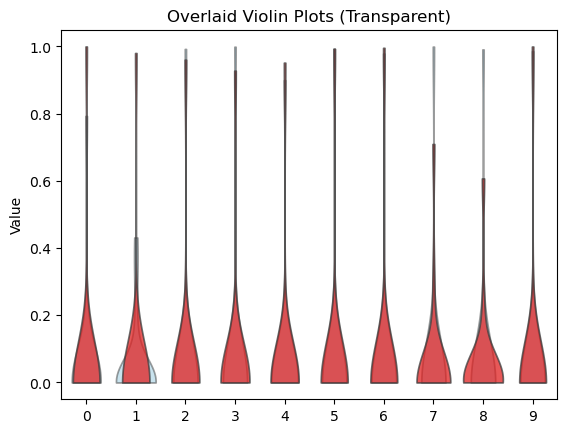

In [81]:
print(esm_dict[17]['sequence'])
print(esm_dict[1]['sequence'])

A = esm_dict[17]['log_probs']
B = esm_dict[1]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists1 = []
dists2 = []
for i in range(20):
    da = np.array(eA[i])
    db = np.array(eB[i])
    dists1.append(da)
    dists2.append(db)

sns.violinplot(data=dists1[0:10], color="skyblue", alpha=0.5, inner=None, cut=0)
sns.violinplot(data=dists2[0:10], color="red", alpha=0.75, inner=None, cut=0)

#cut off y-axis at zero

plt.title("Overlaid Violin Plots (Transparent)")
plt.ylabel("Value")
plt.show()

In [79]:
A = esm_dict[21]['log_probs']
print(A[10])

eA = torch.exp(A)
print(eA[10])

tensor([-1.0470e+01, -1.2294e+01, -1.0868e+01, -7.6313e-04, -1.2674e+01,
        -9.2160e+00, -1.1557e+01, -1.2295e+01, -8.2046e+00, -1.0543e+01,
        -1.2924e+01, -1.1268e+01, -1.0120e+01, -9.1488e+00, -1.0254e+01,
        -1.0150e+01, -1.1869e+01, -1.0828e+01, -1.2485e+01, -1.1727e+01])
tensor([2.8388e-05, 4.5801e-06, 1.9066e-05, 9.9924e-01, 3.1303e-06, 9.9432e-05,
        9.5733e-06, 4.5754e-06, 2.7338e-04, 2.6388e-05, 2.4396e-06, 1.2775e-05,
        4.0278e-05, 1.0634e-04, 3.5200e-05, 3.9081e-05, 7.0045e-06, 1.9827e-05,
        3.7842e-06, 8.0718e-06])
